In [1]:
from dataset import Stage2Augmentation, PartsDataset
import torchvision
from torch.utils.data import DataLoader, ConcatDataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch

In [2]:
root_dir = "/home/yinzi/data1/facial_parts"

txt_file_names = {
    'train': "exemplars.txt",
    'val': "tuning.txt"
}

# Stage 2 augmentation
stage2_augmentation = Stage2Augmentation(dataset=PartsDataset,
                                                txt_file=txt_file_names,
                                                root_dir=root_dir,
                                                resize=(64, 64)
                                                )
enhaced_stage2_datasets = stage2_augmentation.get_dataset()
stage2_datloaders = {x: DataLoader(enhaced_stage2_datasets[x], batch_size=16,
                             shuffle=True, num_workers=4)
               for x in ['train', 'val']}

torch.Size([16, 3, 64, 64])
torch.Size([16, 4, 3, 64, 64])
torch.Size([16, 3, 64, 64])


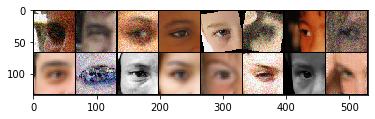

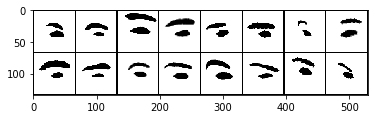

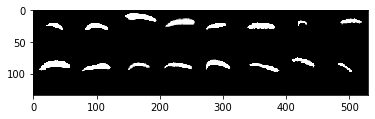

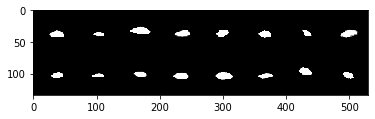

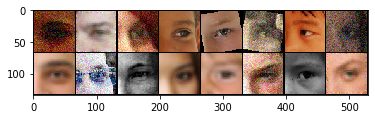

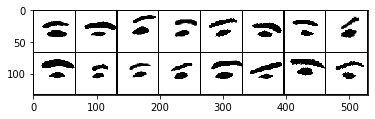

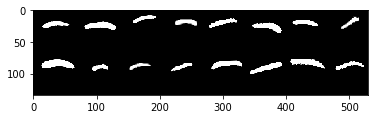

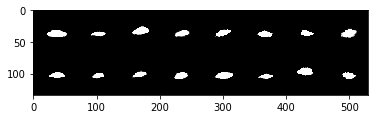

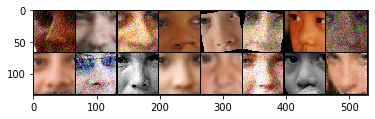

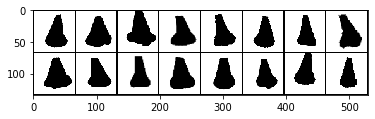

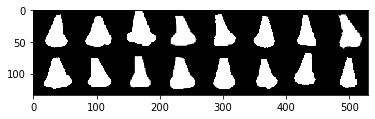

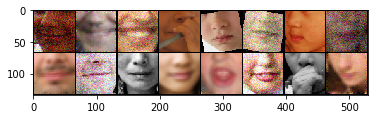

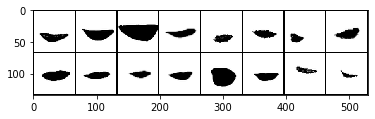

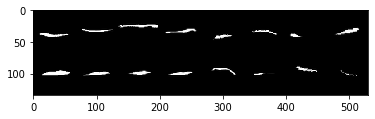

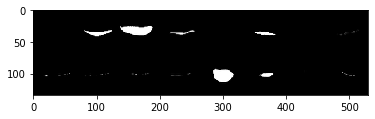

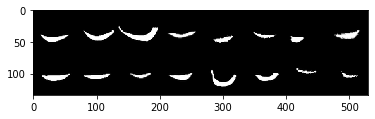

In [3]:
#   Test Stage1 augmentation

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
batch = next(iter(stage2_datloaders['train']))
# for batch in dataloaders['train']:
inputs = batch['image']
labels = batch['labels']
print(labels['eye1'].shape)
    
# Make a grid from batch
print(inputs.shape)
print(labels['eye1'].shape)

count = 0
for x in ['eye1','eye2','nose','mouth']:
    out = torchvision.utils.make_grid(inputs[:, count])
    imshow(out)
    count += 1
    for i in range(labels[x].shape[1]):
        out_2 = torchvision.utils.make_grid(torch.unsqueeze(labels[x][:, i], dim=1))
        imshow(out_2)



